In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\shree\Desktop\Preplaced\ML\dataset\Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [5]:
x = df.drop(columns='Salary')
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [6]:
y = df['Salary']
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [7]:
# train -Test split

from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [9]:
x_train.head()

,YearsExperience
0,1.1
4,2.2
16,5.1
5,2.9
13,4.1


In [10]:
# Standardization of data 


from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

x_train=scalar.fit_transform(x_train)

In [11]:
x_test=scalar.fit_transform(x_test)
x_test

array([[ 1.21915163],
       [-0.59032605],
       [ 0.68015828],
       [-0.43632795],
       [-1.24481798],
       [-1.05232035],
       [ 1.48864831],
       [ 0.8726559 ],
       [-0.93682178]])

In [12]:

from sklearn.linear_model import LinearRegression
regress = LinearRegression()
regress.fit(x_train,y_train)

LinearRegression()

In [13]:
## Cross validation
from sklearn.model_selection import cross_val_score

In [14]:
mse = cross_val_score(regress,x_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [15]:
np.mean(mse)

-31312051.519272286

In [16]:
## Prediction

pred = regress.predict(x_test)

In [17]:
pred

array([102159.88274256,  55997.15151413,  88409.28195111,  59925.8945974 ,
        39299.99341023,  44210.92226431, 109035.18313829,  93320.2108052 ,
        47157.47957677])

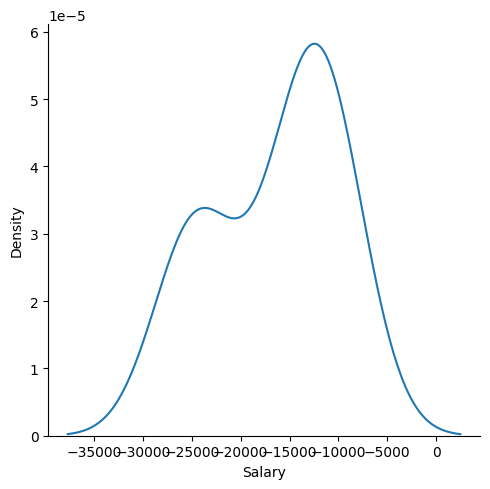

In [18]:
import seaborn as sns

sns.displot(pred-y_test,kind='kde')

In [19]:
from sklearn.metrics import r2_score
score = r2_score(pred,y_test)
score

0.5273208697640998

: 